## Atividade 1 - Regressão Linear 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class RegressaoLinearSimples():
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        
        self.X = X
        self.y = y
        
        x_mean = np.mean(self.X)
        y_mean = np.mean(self.y)
        
        self.b1 = np.sum((self.X - x_mean)*(self.y - y_mean))
        self.b1 = self.b1/np.sum((self.X - x_mean)**2)
        
        self.b0 = y_mean - (self.b1*x_mean)
        
    def predict(self, _X):
        
        self._y = self.b0 + self.b1*X
        return self._y
        #_y = np.zeros(_X.shape[0])
        
        #for i,x in enumerate(X):
        #    _y[i] = self.b0 + self.b1*x
            
        #return _y

In [16]:
class RegressaoLinearMultipla():
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        
        bias = np.ones((X.shape[0],1))
        self.X = np.concatenate( (bias,X),axis=1)
        self.y = y
        
        self.b_ = self.X.T.dot( self.X )
        self.b_ = np.linalg.inv(self.b_)
        self.b_ = self.b_.dot(self.X.T)
        self.b_ = self.b_.dot(self.y)
        
    def predict(self, _X):
        
        bias = np.ones((_X.shape[0],1))
        _X = np.concatenate( (bias,_X),axis=1)
        
        _y = np.zeros(_X.shape[0])
        
        for i,x in enumerate(_X):
            _y[i] = np.sum(self.b_ * x)
            
        return _y

In [36]:
def RSS( y_true, y_predict ):
    return np.sum( np.power((y_true-y_predict),2) )

def RSE( y_true, y_predict ):  
    n = y_true.shape[0]
    rss = RSS(y_true, y_predict)
    return np.power(( rss/(n-2) ),0.5)

def R2( y_true, y_predict ):
    y_mean = np.mean(y_true)
    tss = np.sum( np.power((y_true-y_mean),2) )
    rss = RSS( y_true, y_predict )
    return 1 - ( rss/tss )

def MAE( y_true, y_predict ):
    n = y_true.shape[0]
    return np.sum( np.absolute(y_true-y_predict) ) / n

In [37]:
data = pd.read_csv("Data/Advertising.csv",usecols=["TV","radio","newspaper","sales"])

b0:  7.032593549127698
b1:  0.047536640433019736

RSS:  2102.5305831313512
RSE:  3.2586563686504624
R2:  0.611875050850071
MAE:  2.5498060389274864


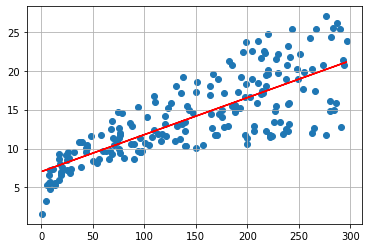

In [38]:
# Questão 01
#      i- Tv and Sales

X = data["TV"]
y = data["sales"]

rls = RegressaoLinearSimples()
rls.fit(X,y)

y_ = rls.predict(X)

plt.scatter(X, y)
plt.plot(X,y_, c='r')
plt.grid()

print("b0: ", rls.b0)
print("b1: ", rls.b1)
print()
print("RSS: ",RSS(y,y_))
print("RSE: ",RSE(y,y_))
print("R2: ",R2(y,y_))
print("MAE: ",MAE(y,y_))

b0:  9.311638095158282
b1:  0.20249578339243965

RSS:  3618.479549025088
RSE:  4.27494435490106
R2:  0.33203245544529525
MAE:  3.3202187976420667


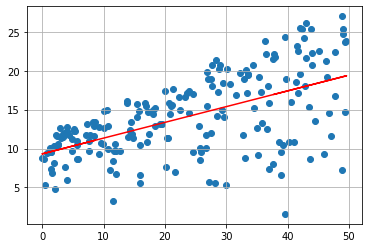

In [39]:
#      i- Radio and Sales

X = data["radio"]
y = data["sales"]

rls = RegressaoLinearSimples()
rls.fit(X,y)

y_ = rls.predict(X)

plt.scatter(X, y)
plt.plot(X,y_, c='r')
plt.grid()

print("b0: ", rls.b0)
print("b1: ", rls.b1)
print()
print("RSS: ",RSS(y,y_))
print("RSE: ",RSE(y,y_))
print("R2: ",R2(y,y_))
print("MAE: ",MAE(y,y_))

b0:  12.351407069278164
b1:  0.05469309847227334

RSS:  5134.804544111939
RSE:  5.092480366520192
R2:  0.05212044544430516
MAE:  4.1465597438384885


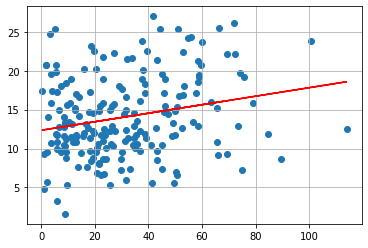

In [40]:
#      i- Newspaper and Sales

X = data["newspaper"]
y = data["sales"]

rls = RegressaoLinearSimples()
rls.fit(X,y)

y_ = rls.predict(X)

plt.scatter(X, y)
plt.plot(X,y_, c='r')
plt.grid()

print("b0: ", rls.b0)
print("b1: ", rls.b1)
print()
print("RSS: ",RSS(y,y_))
print("RSE: ",RSE(y,y_))
print("R2: ",R2(y,y_))
print("MAE: ",MAE(y,y_))

In [41]:
# Questão 02

X = data.iloc[:,:-1].values
y = data["sales"].values

rlm = RegressaoLinearMultipla()
rlm.fit(X,y)

y_ = rlm.predict(X)


for i,b in enumerate(rlm.b_):
    print("b",i,": ",b)

print()
print("RSS: ",RSS(y,y_))
print("RSE: ",RSE(y,y_))
print("R2: ",R2(y,y_))
print("MAE: ",MAE(y,y_))


b 0 :  2.9388893694594476
b 1 :  0.04576464545539749
b 2 :  0.18853001691820429
b 3 :  -0.0010374930424764811

RSS:  556.8252629021872
RSE:  1.6769760888385674
R2:  0.8972106381789522
MAE:  1.2520112296870658


In [ ]:
# @ == np.dot()